# Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from unidecode import unidecode
import matplotlib.pyplot as plt

# Fetch the offers to jobmarket

In [2]:
# Request data from API
user = "hacomar@fulp.es"
clave = "Atenas.2023"
base_url = "https://www.jobmarketinsights.com/jmi-api/"
login_url = base_url + "token"

# Log into API

In [3]:
def login():
    # Define the headers to set the Content-Type
    headers = {'Content-Type': 'application/json'}
    # Create a dictionary containing the data to send as JSON
    payload = {'email': user, 'password': clave}
    # Convert the payload to JSON format
    json_payload = json.dumps(payload)
    # Send the POST request with the specified headers and JSON data
    r = requests.post(login_url, data=json_payload, headers=headers)
    # Check if the request was successful (status code 200)
    if r.status_code == 200:
        # Parse the JSON response
        data = r.json()
        token = data["auth"]["token"]
        return token
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
token = login()
print(token)

VGWL3WQ4JB4HH5OF5EVGYTDV2RTA75VFSF5EBG427JMRAQK2S76Q


# Scope

In [4]:
scope_url = base_url + "scopes"
def get_scope(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(scope_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_scope(token)
scopes = response["scopes"][0]["key"]
print(scopes)

792


# Periods

In [5]:
# Ask for list with able periods
periods_url = base_url + "periods"
def get_periods(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(periods_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['periods']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# Returns an array of dicts with 4 keys: from, label, to, key
periods = get_periods(token)
print(periods)
# For example, we will use the first period
period = periods[10]
initial_date = period['from']
end_date = period['to']

[{'from': '2023-10-12', 'label': 'Últimos días', 'to': '2023-10-16', 'key': 'ld'}, {'from': '2023-09-01', 'label': 'sep 2023', 'to': '2023-10-01', 'key': '2023-09'}, {'from': '2023-08-01', 'label': 'ago 2023', 'to': '2023-09-01', 'key': '2023-08'}, {'from': '2023-07-01', 'label': 'jul 2023', 'to': '2023-08-01', 'key': '2023-07'}, {'from': '2023-06-01', 'label': 'jun 2023', 'to': '2023-07-01', 'key': '2023-06'}, {'from': '2023-05-01', 'label': 'may 2023', 'to': '2023-06-01', 'key': '2023-05'}, {'from': '2023-04-01', 'label': 'abr 2023', 'to': '2023-05-01', 'key': '2023-04'}, {'from': '2023-03-01', 'label': 'mar 2023', 'to': '2023-04-01', 'key': '2023-03'}, {'from': '2023-02-01', 'label': 'feb 2023', 'to': '2023-03-01', 'key': '2023-02'}, {'from': '2023-01-01', 'label': 'ene 2023', 'to': '2023-02-01', 'key': '2023-01'}, {'from': '2022-12-01', 'label': 'dic 2022', 'to': '2023-01-01', 'key': '2022-12'}, {'from': '2022-11-01', 'label': 'nov 2022', 'to': '2022-12-01', 'key': '2022-11'}, {'fr

# Missing advertisers

In [6]:
missing_adverts_url = base_url + "missingAdvertisers"

def create_payload(token, initial_date, end_date, size=100, offset=0):
    payload = {'location': 'ES', 'token': token,"period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "offset": offset}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    return json_payload, headers

def get_missing_adverts(token, scope, initial_date, end_date, size=100, offset=0):
    payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
    json_payload = json.dumps(payload)
    r = requests.post(missing_adverts_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
# print(get_missing_adverts(token, scopes, initial_date, end_date))

# Reports

In [7]:
# reports_url = base_url + "report"
# def get_reports(token, scope, primaryField, initial_date="2020-01-01", final_date="2020-12-31", size=100, offset=0):
#     json_payload, headers = create_payload(token, scope, initial_date, end_date, size, offset)
#     primary_field = {"primaryField" : primaryField}
#     # Add the primaryField to the payload
#     payload = json.loads(json_payload)
#     payload.update(primary_field)
#     json_payload = json.dumps(payload)
#     r = requests.post(reports_url, data=json_payload, headers=headers)
#     if r.status_code == 200:
#         data = r.json()
#         return data
#     else:
#         print(f"Request failed with status code {r.status_code}")
#         return None
# response = get_reports(token, scopes, "location", initial_date, end_date)
# print(response)

# Sites

In [8]:
sites_url = base_url + "sites"
def get_sites(token):
    payload = {'token': token}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(sites_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
response = get_sites(token)
print(response)

{'total': {'offers': 262842, 'companies': 50837}, 'auth': {'token': 'VGWL3WQ4JB4HH5OF5EVGYTDV2RTA75VFSF5EBG427JMRAQK2S76Q'}, 'sites': [{'offers': 80874, 'companies': 17121, 'label': 'infojobs.net', 'key': '1963'}, {'offers': 40338, 'companies': 3875, 'label': 'es.talent.com', 'key': '4142'}, {'offers': 39185, 'companies': 13517, 'label': 'linkedin.com', 'key': '3455'}, {'offers': 37985, 'companies': 7483, 'label': 'indeed', 'key': '3427'}, {'offers': 20725, 'companies': 9270, 'label': 'jobtoday.com', 'key': '4023'}, {'offers': 12320, 'companies': 4962, 'label': 'glassdoor.com', 'key': '3933'}, {'offers': 11233, 'companies': 1030, 'label': 'empleate.gob.es', 'key': '4058'}, {'offers': 11144, 'companies': 471, 'label': 'iberempleos.es', 'key': '4254'}, {'offers': 10985, 'companies': 380, 'label': 'epreselec.com', 'key': '4186'}, {'offers': 5909, 'companies': 1191, 'label': 'monster.es', 'key': '3464'}, {'offers': 5175, 'companies': 353, 'label': 'infoempleo.com', 'key': '3451'}, {'offers

# Offers

In [9]:
offers_url = base_url + "offers"
def get_offers(token, initial_date, end_date, size=100, offset=0, site=None):
    json_payload, headers = create_payload(token, initial_date, end_date, size, offset)
    # Add the site to the payload
    site = {"site" : "1963"}
    payload = json.loads(json_payload)
    payload.update(site)
    json_payload = json.dumps(payload)
    r = requests.post(offers_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
initial_date = '2023-10-09'
end_date = '2023-10-12'
response = get_offers(token, initial_date, end_date, size=1, offset=1)
print(response[0])


{'description': '¡Hola!¡Queremos conocerte!\n\n¿Te apasiona el mundo del comercio? ¿Te preocupas por los detalles? ¿Te consideras una persona dinámica? ¡Te estábamos esperando! \n\nCarrefour es una empresa líder en comercio de alimentación y distribución y queremos que inicies una carrera profesional llena de posibilidades con nuestros mejores profesionales. \n\nPretendemos que todos los días sean un aprendizaje, que crezcas y llegues tan lejos como quieras. Te ofrecemos formación a cargo de la empresa y la posibilidad de promocionar internamente para seguir creciendo con nosotros.\n\n¿Qué buscamos? \n\nCarrefour lo formamos un equipo de personas orientadas al Cliente, siempre con ganas de aprender e innovar en cuanto a la experiencia de compra en nuestras tiendas.\n\nPara lograr este objetivo buscamos un/a AUXILIAR DE MANTENIMIENTO \n\nBuscamos personas con formación técnica y experiencia en Gestión de Mantenimiento. Con adaptación a entornos dinámicos, en continua mejora de procesos 

# Offers count

In [10]:
count_url = base_url + "count"
def get_count(token, initial_date, end_date):
    payload = {'token': token, "period" : "custom", "customDateFrom": initial_date, "customDateTo": end_date, "location":"ES"}
    headers = {'Content-Type': 'application/json'}
    json_payload = json.dumps(payload)
    r = requests.post(count_url, data=json_payload, headers=headers)
    if r.status_code == 200:
        data = r.json()
        return data['offers']['market']
    else:
        print(f"Request failed with status code {r.status_code}")
        return None
def get_all_offers(token, max_offers=1000):
    offers = []
    for period in periods:
        initial_date = period['from']
        end_date = period['to']
        print(f"Period: {initial_date} - {end_date}")
        count = get_count(token, initial_date, end_date)
        print(f"Count: {count}")
        for index in range(0, count, 100):
            if count - index < 100:
                size = count - index
            else:
                size = 100
            response = get_offers(token, initial_date, end_date, size=size, offset=index)
            offers.extend(response)
            if len(offers) >= max_offers:
                return offers
    return offers
offers = get_all_offers(token, max_offers=10000)

Period: 2023-10-12 - 2023-10-16
Count: 256976


In [11]:
def format_offer(offer):
    expected_keys = ['title', 'description', 'company', 'location', 'category']
    expected_keys_post = ['date', 'site', 'id', 'url']
    expected_keys_labeled = ['category', 'site', 'location']
    formated_offer = {}
    for key in expected_keys:
        if key not in offer:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = offer[key]['label']
            else:
                formated_offer[key] = offer[key]
    post = get_last_record(offer['postings'])
    for key in expected_keys_post:
        if key not in post:
            formated_offer[key] = None
        else:
            if key in expected_keys_labeled:
                formated_offer[key] = post[key]['label']
            else:
                formated_offer[key] = post[key]
    return formated_offer

def get_last_record(postings):
    dates = []
    for post in postings:
        dates.append(post['date'])
    # Get index of the last date
    index = dates.index(max(dates))
    return postings[index]

def format_all_offers(offers):
    formated_offers = []
    for offer in offers:
        formated_offers.append(format_offer(offer))
    return formated_offers

formated_offers = format_all_offers(offers)
with open("offers.txt",'w') as f:
    for offer in formated_offers:
        f.write(str(offer['description']) + "\n\n##############\n\n")

# Read INFOJOBS_ESTUDIOS dataset

In [12]:
df = pd.read_json("INFOJOBS_ESTUDIOS.json")
# Delete duplicates and register from the column "nivel" with "(Seleccionar)"
df = df[df['nivel'] != "(Seleccionar)"]
expection_list = ["(Seleccionar)", "(regladas)", "(no regladas)", "Grado en", "PCEO", "Teoría de la", "\/"]
def format_denominacion(denominacion):
    for expection in expection_list:
        if expection in denominacion:
            denominacion = denominacion.replace(expection, "")
    return unidecode(denominacion).lower()
df["nivel"] = df["nivel"].apply(format_denominacion)
df["denominacion"] = df["denominacion"].apply(format_denominacion)
niveles_df = pd.read_json("niveles_estudio.json")
niveles_df['denominacion'] = niveles_df['denominacion'].apply(format_denominacion)
# Cast from df to dict key: denominacion, value: nivel
niveles = {}
for denominacion, group in niveles_df.groupby('denominacion'):
    niveles[denominacion] = int(group['id_nivel'].tolist()[0])
# Create a dictionary
titles = {}
for denominacion, group in df.groupby('denominacion'):
    titles[denominacion] = group['nivel'].tolist()

In [13]:
niveles

{'bachillerato': 50,
 'ciclo formativo grado medio': 35,
 'ciclo formativo grado superior': 60,
 'diplomatura': 110,
 'doctorado': 150,
 'educacion secundaria obligatoria': 20,
 'ensenanzas artisticas ': 23,
 'ensenanzas deportivas ': 27,
 'formacion profesional grado medio': 30,
 'formacion profesional grado superior': 55,
 'grado': 125,
 'ingenieria superior': 130,
 'ingenieria tecnica': 120,
 'licenciatura': 140,
 'master': 147,
 'otros cursos y formacion no reglada': 170,
 'otros titulos, certificaciones y carnes': 160,
 'postgrado': 143,
 'sin estudios': 10}

# Custom niveles and titles

In [14]:
# Add custom niveles
niveles_additional = ['grado medio', 'grado superior', 'licenciado', 'diplomado']
niveles_medio_list = [niveles['ciclo formativo grado medio'] , niveles['formacion profesional grado medio']]
niveles_superior_list = [niveles['ciclo formativo grado superior'] , niveles['formacion profesional grado superior']]
niveles['grado medio o superior'] = niveles_medio_list + niveles_superior_list
niveles['grado medio'] = niveles_medio_list
niveles['grado superior'] = niveles_superior_list
niveles['licenciado'] = niveles['licenciatura']
niveles['diplomado'] = niveles['diplomatura']
niveles['phd'] = niveles['doctorado']

# Add custom titles
titles['grado medio'] = titles['ciclo formativo grado medio'] + titles['formacion profesional grado medio']
titles['grado superior'] = titles['ciclo formativo grado superior'] + titles['formacion profesional grado superior']
titles['grado medio o superior'] = titles['grado medio'] + titles['grado superior']
titles['licenciado'] = titles['licenciatura']
titles['diplomado'] = titles['diplomatura']
titles['phd'] = titles['doctorado']

# Test search function

In [15]:
def get_niveles(niveles, description):
    obteined_niveles = []
    for nivel in niveles.keys():
        if nivel in description:
            obteined_niveles.append(nivel)
    return obteined_niveles

def get_titulo(titles, description, obteined_niveles):
    titulo = []
    for nivel in obteined_niveles:
        if nivel in titles:
            excepted_titles = titles[nivel]
            for title in excepted_titles:
                if title in description:
                    titulo.append(title)
    return titulo

def add_nivel_to_offer(niveles, offer):
    numerical_niveles = []
    obteined_niveles = offer['denominacion_nivel']
    for nivel in obteined_niveles:
        if nivel in niveles:
            numerical_niveles.append(niveles[nivel])
    return numerical_niveles

def get_min_and_max_nivel(offer):
    flattened_numerical_niveles = []
    for sublist in offer['numerical_niveles']:
        if isinstance(sublist, list):
            flattened_numerical_niveles.extend(sublist)
        elif isinstance(sublist, int):
            flattened_numerical_niveles.append(sublist)
    return min(flattened_numerical_niveles), max(flattened_numerical_niveles)

def normalize_offer(niveles, titles, offer, estrict=True):
    description = unidecode(offer['description']).lower()
    # Verify if the offer description have "Requisitos"
    if estrict:
        if "requisitos" not in description:
            return offer
        # Rewrite the description, from "requisitos" to the end of the description
        description = description[description.find("requisitos"):]
    obteined_niveles = get_niveles(niveles, description)
    if len(obteined_niveles) > 0:
        offer['denominacion_nivel'] = obteined_niveles
        offer['numerical_niveles'] = add_nivel_to_offer(niveles, offer)
        offer['min_nivel'], offer['max_nivel'] = get_min_and_max_nivel(offer)
        # min_index = offer['numerical_niveles'].index(offer['min_nivel'])
        # max_index = offer['numerical_niveles'].index(offer['max_nivel'])
        obteined_titles = get_titulo(titles, description, obteined_niveles)
        if len(obteined_titles) > 0:
            offer['titulo'] = obteined_titles
    return offer


def normalize_to_infojobs_offer(niveles, titles, offers):
    for offer in offers:
        offer = normalize_offer(niveles, titles, offer)
    return offers
offers = normalize_to_infojobs_offer(niveles, titles, formated_offers)

In [16]:
# Get the first offer with "niveles"
for offer in offers:
    if 'titulo' in offer:
        print(offer)
        break

{'title': 'Coordinador de Seguridad y Salud', 'description': '¿Quiénes es Applus+? Applus+ es una de las empresas líderes mundiales en el sector de la inspección, los ensayos y la certificación.\n¿Qué te aportará unirte a nuestro equipo? En Applus+ trabajamos más de 23.000 personas en todo el mundo. Formarás parte de un equipo de profesionales cualificados dentro del Departamento de Prevención en Riesgos Laborales con el perfil de Coordinador de Seguridad y Salud.\n¿Cómo será tu día a día?\nTareas propias de Coordinador de Seguridad y Salud en obra de fotovoltaica, entre las que destacan:\nAsesorar al personal interno de la compañía en áreas de su campo de actuación.\nMantener un conocimiento actualizado de la normativa de aplicación en el ámbito de la Prevención y Coordinación de Seguridad y Salud.\nConocer y cumplir las normas de seguridad y de medio ambiente inherentes al puesto.\nInterlocución con el cliente.\nPromover, en particular, las acciones básicas de prevención, como la pul

Total ofertas:  10000
Total ofertas encontradas:  573
Porcentaje: 5.73%


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'grado'),
  Text(1, 0, 'diplomatura'),
  Text(2, 0, 'grado medio'),
  Text(3, 0, 'grado superior'),
  Text(4, 0, 'master'),
  Text(5, 0, 'licenciatura'),
  Text(6, 0, 'licenciado'),
  Text(7, 0, 'ingenieria tecnica'),
  Text(8, 0, 'grado medio o superior'),
  Text(9, 0, 'ciclo formativo grado superior'),
  Text(10, 0, 'ciclo formativo grado medio'),
  Text(11, 0, 'diplomado'),
  Text(12, 0, 'formacion profesional grado superior'),
  Text(13, 0, 'postgrado'),
  Text(14, 0, 'formacion profesional grado medio'),
  Text(15, 0, 'bachillerato'),
  Text(16, 0, 'educacion secundaria obligatoria'),
  Text(17, 0, 'ingenieria superior'),
  Text(18, 0, 'doctorado')])

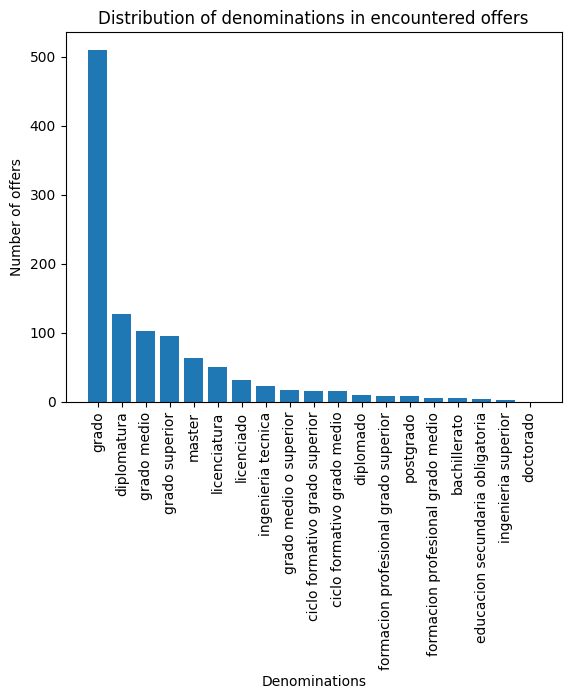

In [18]:
# Get all the offers with "denominacion" and "titulo"
test_offers = [offer for offer in offers if 'titulo' in offer]
print("Total ofertas: ", len(offers))
print("Total ofertas encontradas: ", len(test_offers))
# print the porcentage of offers with "denominacion" and "titulo"
percentage = len(test_offers) / len(offers) * 100
print("Porcentaje: {:.2f}%".format(percentage))
with open("offers.json", 'w') as f:
    json.dump(test_offers, f, indent=4)
# Print how many offers detect in test_offers for each denominacion
obtained_denominations = {}
for offer in test_offers:
    for denomination in offer['denominacion_nivel']:
        if denomination not in obtained_denominations:
            obtained_denominations[denomination] = 0
        else:
            obtained_denominations[denomination] += 1
# Sort by values
obtained_denominations = dict(sorted(obtained_denominations.items(), key=lambda item: item[1], reverse=True))
# And plot the results, in a bar plot
plt.bar(obtained_denominations.keys(), obtained_denominations.values())
plt.title("Distribution of denominations in encountered offers")
plt.xlabel("Denominations")
plt.ylabel("Number of offers")
plt.xticks(rotation=90)